In [6]:
!pip install pycaret --user

  Using cached https://files.pythonhosted.org/packages/c7/41/f7fa05b6ce3cb3096a35fb5ac6dc0f2bb23e8304f068618fb2501be0a562/pycaret-1.0.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/73/22/a5297f3a1f92468cc737f8ce7ba6e5f245fcfafeae810ba37bd1039ea01c/DateTime-4.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/79/c0/f7d8a0eb41ac6f302b4bc100f91b6e0f2558425ccfefaa0ec0430f77ee97/kmodes-0.10.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5e/49/b95c037b717b4ceadc76b6e164603471225c27052d1611d5a2e832757945/xgboost-0.90-py2.py3-none-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/60/f0/1d9bfcc8ee6b83472ec571406bd0dd51c0e6330ff1a51b2d29861d389e85/textblob-0.15.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/16/2b/af8efaee30c0ba4238cb4d0645a07100d33d11d20a8783c443ed8b813eb9/datefinder-0.7.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/package

In [9]:
import pandas as pd
import numpy as np
from pycaret.regression import *

In [10]:
from pycaret.datasets import get_data
data = get_data('insurance')

In [11]:
r2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True,
           feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [12]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2431.9865,1.740156e+07,4171.5181,0.8961,0.3838,0.2808
1,3457.4196,3.447683e+07,5871.6971,0.7995,0.4467,0.3398
2,2945.0344,2.313688e+07,4810.0809,0.7071,0.5482,0.3753
3,2977.1830,2.367170e+07,4865.3573,0.8023,0.5543,0.4140
4,3277.2873,2.964944e+07,5445.1296,0.7795,0.5152,0.3197
5,3032.8836,2.080107e+07,4560.8193,0.8662,0.3683,0.2857
6,2731.0427,2.279179e+07,4774.0745,0.8449,0.4074,0.3364
7,3079.7012,2.782642e+07,5275.0757,0.8470,0.4530,0.2889
8,3020.2037,2.321867e+07,4818.5753,0.8500,0.4306,0.3755
9,3140.6847,2.876631e+07,5363.4235,0.8147,0.5104,0.3531


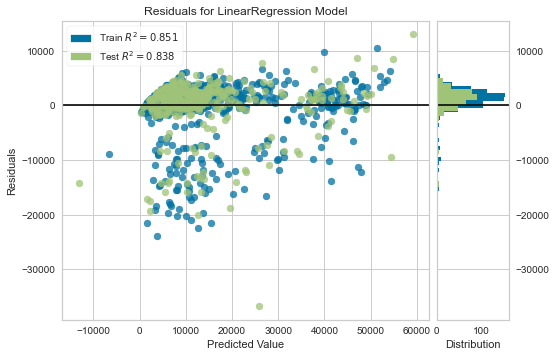

In [13]:
plot_model(lr, plot = 'residuals')

In [14]:
save_model(lr, model_name = 'deployment_20072020')

Transformation Pipeline and Model Succesfully Saved


In [16]:
deployment_20072020 = load_model('deployment_20072020')
deployment_20072020

Transformation Pipeline and Model Sucessfully Loaded


[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catagorical_Levels...
                 ('dummy', Dummify(target='charges')),
                 ('fix_perfect', Remove_100(target='charges')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', Empty()), ('fix_multi', Empty()),
                 ('dfs',
                  DFS_Classic(interactions

In [ ]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())